In [1]:
%load_ext autoreload
%autoreload 2
from vpower.interp import SimulationParticles
import matplotlib.pyplot as plt
plt.style.use('yjhe.mplstyle')

SNAPSHOT = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind0_gmc9/snapshot_550.hdf5'
allPar = SimulationParticles.load_snapshot(SNAPSHOT, remove_bulk_velocity=False)          # load the snapshot

Only the CPU-only flavour of Voxelize is available!


In [2]:
import numpy as np
"Our pixel is {} times bigger than the smallest particles"\
.format(1/16384/np.min(allPar.h()))

'Our pixel is 50.83025120016474 times bigger than the smallest particles'

In [3]:
smallPar = allPar[allPar.h() < 1/16384]
print("The number of particles with r < 1/16384 is {}, in fraction {:.2%}"\
.format(len(smallPar), len(smallPar)/len(allPar)))
print("Have an average mass of {} and an average density of {}"\
.format(smallPar.mass.mean(), smallPar.density.mean()))
print("Compare to the average mass of {} and the average density of {}"\
.format(allPar.mass.mean(), allPar.density.mean()))

The number of particles with r < 1/16384 is 52713, in fraction 0.55%
Have an average mass of 4.465161724875131e-11 and an average density of 1209.079290204402
Compare to the average mass of 1.3096474963097345e-10 and the average density of 6.932348904835645


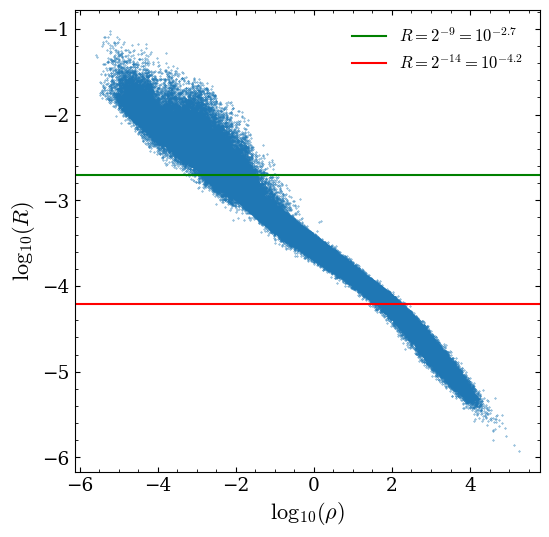

In [4]:
import numpy as np                            # plot already saved
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(np.log10(allPar.density), np.log10(allPar.h()), s=0.1)
ax.axhline(np.log10(1/512), label="$R=2^{{-9}}=10^{{-2.7}}$", c="g")
ax.axhline(np.log10(1/16384), label="$R=2^{{-14}}=10^{{-4.2}}$", c="r")
ax.set_xlabel(r"$\log_{10}(\rho)$")
ax.set_ylabel(r"$\log_{10}(R)$")
plt.legend()
plt.show()